In [36]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [4]:
filename = os.path.join(os.getcwd(), "data", "/kaggle/input/youtube-channel-performance-analytics/youtube_channel_real_performance_analytics.csv")

In [5]:
df = pd.read_csv(filename)

In [8]:
# checks the number of rows and columns in the dataset
df.shape

(364, 70)

In [11]:
# this will check what is in the dataset
df.head(# Replace NaN values with a specific value (e.g., -1 or 'Unknown')
df_cleaned = df_cleaned.fillna(-1)  # or df_cleaned.fillna('Unknown')

# Display the cleaned DataFrame
print(df_cleaned.head())
)

,ID,Video Duration,Video Publish Time,Days Since Publish,Day,Month,Year,Day of Week,Revenue per 1000 Views (USD),Monetized Playbacks (Estimate),...,Watched (Not Skipped) (%),Feed Impressions,Average View Percentage (%),Average View Duration,Views,Watch Time (hours),Subscribers,Estimated Revenue (USD),Impressions,Video Thumbnail CTR (%)
0,0,201.0,2016-06-02 00:00:00,0,2,6,2016,Thursday,0.024,723.0,...,0.0,0.0,40.38,81.0,23531.0,533.1636,51.0,0.561,41118.0,27.66
1,1,391.0,2016-06-10 00:00:00,8,10,6,2016,Friday,0.056,727.0,...,0.0,0.0,39.85,156.0,11478.0,500.5628,33.0,0.648,41627.0,5.85
2,2,133.0,2016-06-14 00:00:00,4,14,6,2016,Tuesday,0.014,76.0,...,0.0,0.0,30.88,41.0,6153.0,70.7287,8.0,0.089,38713.0,7.07
3,3,14.0,2016-06-29 00:00:00,15,29,6,2016,Wednesday,0.004,18.0,...,0.0,0.0,103.05,14.0,4398.0,17.6251,2.0,0.017,35245.0,5.60
4,4,45.0,2016-07-01 00:00:00,2,1,7,2016,Friday,0.000,0.0,...,0.0,0.0,55.70,25.0,14659.0,104.3341,28.0,0.000,46218.0,8.62


In [19]:
# Drop columns where all values are zero
df_cleaned = df.loc[:, (df != 0).any(axis=0)]

# Display the remaining columns after removal
df_cleaned.head()


,ID,Video Duration,Video Publish Time,Days Since Publish,Day,Month,Year,Day of Week,Revenue per 1000 Views (USD),Monetized Playbacks (Estimate),...,Watched (Not Skipped) (%),Feed Impressions,Average View Percentage (%),Average View Duration,Views,Watch Time (hours),Subscribers,Estimated Revenue (USD),Impressions,Video Thumbnail CTR (%)
0,0,201.0,2016-06-02 00:00:00,0,2,6,2016,Thursday,0.024,723.0,...,0.0,0.0,40.38,81.0,23531.0,533.1636,51.0,0.561,41118.0,27.66
1,1,391.0,2016-06-10 00:00:00,8,10,6,2016,Friday,0.056,727.0,...,0.0,0.0,39.85,156.0,11478.0,500.5628,33.0,0.648,41627.0,5.85
2,2,133.0,2016-06-14 00:00:00,4,14,6,2016,Tuesday,0.014,76.0,...,0.0,0.0,30.88,41.0,6153.0,70.7287,8.0,0.089,38713.0,7.07
3,3,14.0,2016-06-29 00:00:00,15,29,6,2016,Wednesday,0.004,18.0,...,0.0,0.0,103.05,14.0,4398.0,17.6251,2.0,0.017,35245.0,5.60
4,4,45.0,2016-07-01 00:00:00,2,1,7,2016,Friday,0.000,0.0,...,0.0,0.0,55.70,25.0,14659.0,104.3341,28.0,0.000,46218.0,8.62


In [40]:
# Ensure no chained indexing
df_cleaned.loc[:, 'Video Publish Time'] = pd.to_datetime(df_cleaned['Video Publish Time'])
df_cleaned.loc[:, 'Day of Week'] = df_cleaned['Video Publish Time'].dt.day_name()


In [43]:
# Safely create a new column by using `.loc`
df_cleaned.loc[:, 'Estimated Revenue (USD) in Cents'] = df_cleaned['Estimated Revenue (USD)'] * 100

# Display the updated DataFrame
print(df_cleaned[['Estimated Revenue (USD)', 'Estimated Revenue (USD) in Cents']].head())

   Estimated Revenue (USD)  Estimated Revenue (USD) in Cents
0                    0.561                              56.1
1                    0.648                              64.8
2                    0.089                               8.9
3                    0.017                               1.7
4                    0.000                               0.0


In [44]:
# Select only the columns of interest
columns_of_interest = ['Video Publish Time', 'Day of Week', 'Estimated Revenue (USD)']
df_filtered = df_cleaned[columns_of_interest]

# Display the first few rows
df_filtered.head(15)


,Video Publish Time,Day of Week,Estimated Revenue (USD)
0,2016-06-02,Thursday,0.561
1,2016-06-10,Friday,0.648
2,2016-06-14,Tuesday,0.089
3,2016-06-29,Wednesday,0.017
4,2016-07-01,Friday,0.000
5,2016-07-08,Friday,0.305
6,2016-08-05,Friday,0.003
7,2016-08-08,Monday,0.152
8,2016-08-11,Thursday,0.051
9,2016-08-12,Friday,0.063


In [45]:
# Group by Day of Week and calculate total revenue
revenue_by_day = df_cleaned.groupby('Day of Week')['Estimated Revenue (USD)'].sum()

# Reorder the days
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
revenue_by_day = revenue_by_day.reindex(days_order)

# Display the grouped data
print(revenue_by_day)


Day of Week
Monday       460.579
Tuesday      659.244
Wednesday    342.732
Thursday     395.069
Friday       537.589
Saturday     383.913
Sunday       443.021
Name: Estimated Revenue (USD), dtype: float64


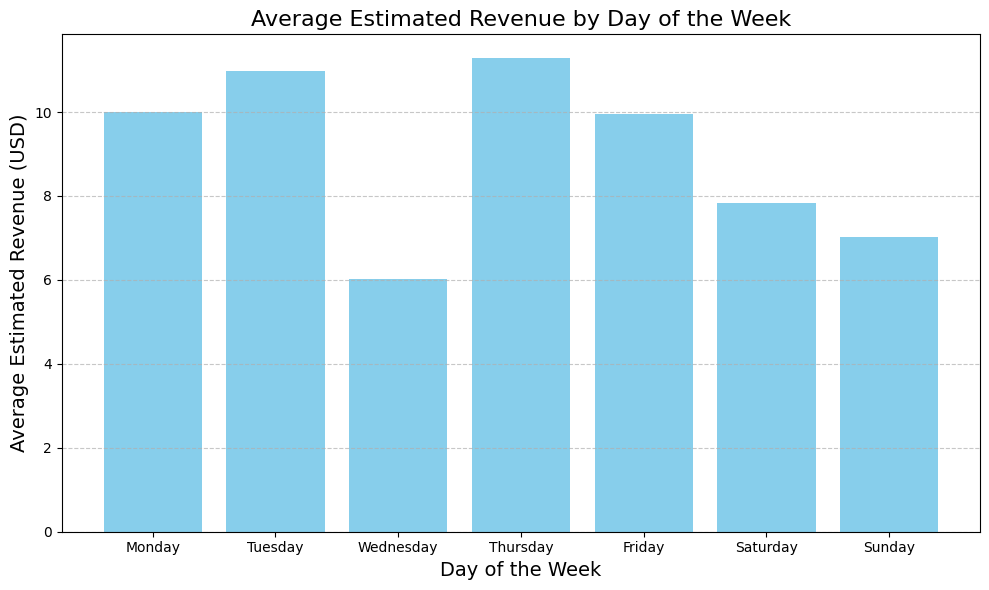

In [48]:
import matplotlib.pyplot as plt

# Aggregate data: average revenue per day
average_revenue_by_day = df_cleaned.groupby('Day of Week')['Estimated Revenue (USD)'].mean()

# Sort the days in the correct order
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
average_revenue_by_day = average_revenue_by_day.reindex(days_order)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(average_revenue_by_day.index, average_revenue_by_day.values, color='skyblue')

# Add titles and labels
plt.title('Average Estimated Revenue by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Average Estimated Revenue (USD)', fontsize=14)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()



Thursday stands out as the optimal day for posting, as it consistently drives more revenue compared to other days of the week. This trend could be due to several reasons people may have more time to engage with content as the workweek slows down.

In [52]:
df.head()

,ID,Video Duration,Video Publish Time,Days Since Publish,Day,Month,Year,Day of Week,Revenue per 1000 Views (USD),Monetized Playbacks (Estimate),...,Watched (Not Skipped) (%),Feed Impressions,Average View Percentage (%),Average View Duration,Views,Watch Time (hours),Subscribers,Estimated Revenue (USD),Impressions,Video Thumbnail CTR (%)
0,0,201.0,2016-06-02 00:00:00,0,2,6,2016,Thursday,0.024,723.0,...,0.0,0.0,40.38,81.0,23531.0,533.1636,51.0,0.561,41118.0,27.66
1,1,391.0,2016-06-10 00:00:00,8,10,6,2016,Friday,0.056,727.0,...,0.0,0.0,39.85,156.0,11478.0,500.5628,33.0,0.648,41627.0,5.85
2,2,133.0,2016-06-14 00:00:00,4,14,6,2016,Tuesday,0.014,76.0,...,0.0,0.0,30.88,41.0,6153.0,70.7287,8.0,0.089,38713.0,7.07
3,3,14.0,2016-06-29 00:00:00,15,29,6,2016,Wednesday,0.004,18.0,...,0.0,0.0,103.05,14.0,4398.0,17.6251,2.0,0.017,35245.0,5.60
4,4,45.0,2016-07-01 00:00:00,2,1,7,2016,Friday,0.000,0.0,...,0.0,0.0,55.70,25.0,14659.0,104.3341,28.0,0.000,46218.0,8.62


In [57]:
# Select the performance features from the dataset
performance_features = df[['Views', 'Watch Time (hours)', 'Subscribers', 'Estimated Revenue (USD)']]

# Fill missing values in the selected DataFrame with zeros
performance_features = performance_features.fillna(0)


In [58]:
# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(performance_features)


In [59]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)  # Adjust n_clusters as needed
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to the original dataset
df['Performance Cluster'] = clusters


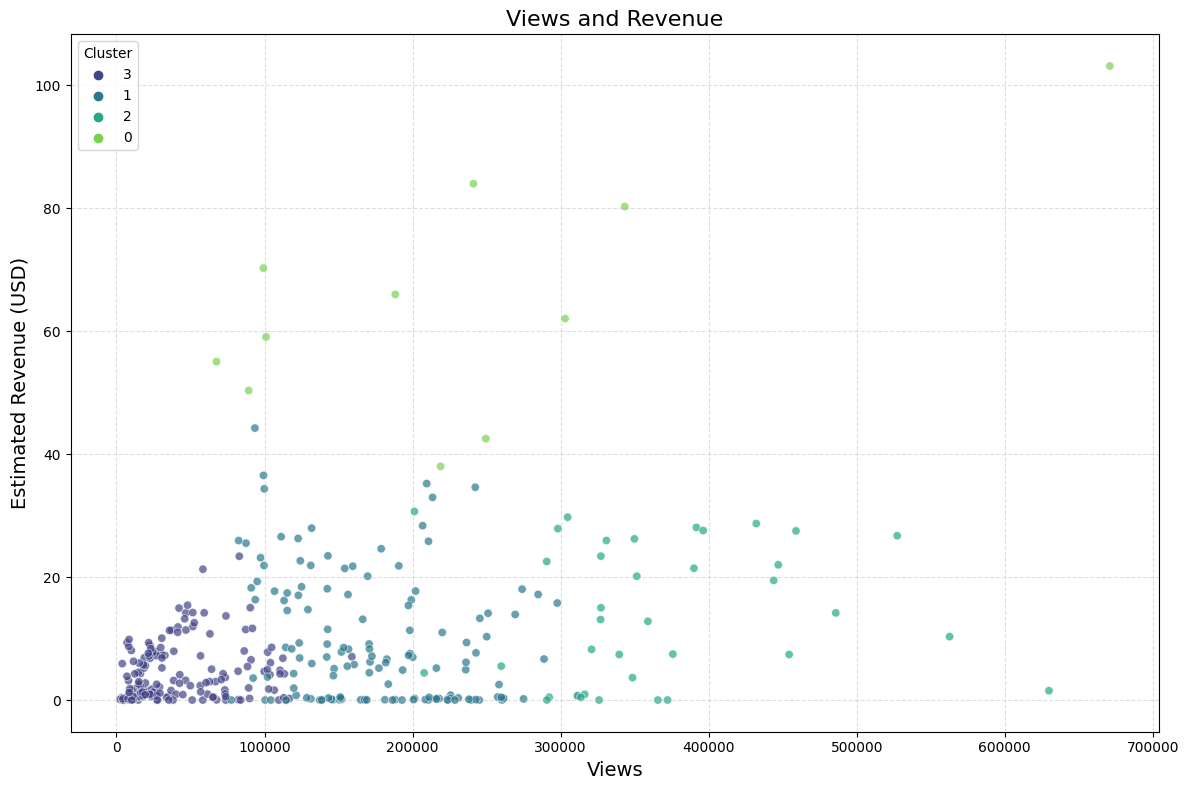

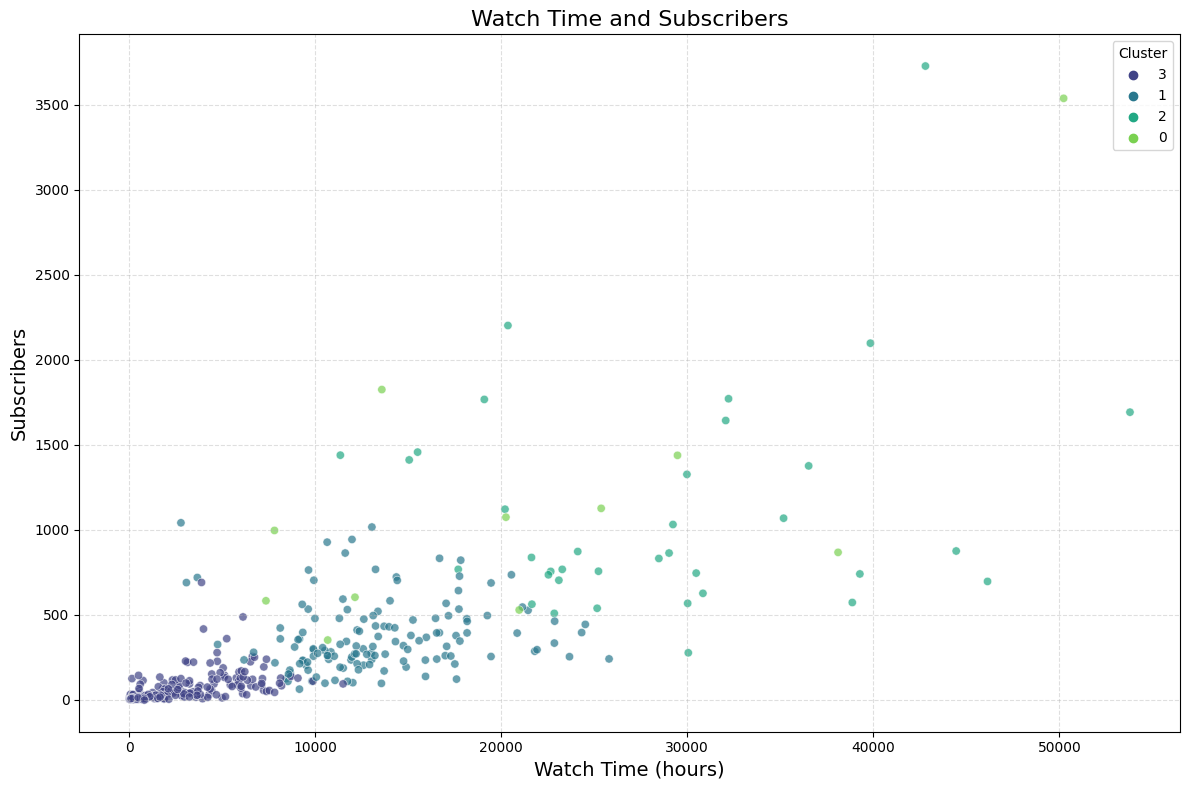

In [62]:
# Convert cluster labels to strings for better visualization
df['Cluster'] = df['Performance Cluster'].astype(str)

# Plot Views vs. Estimated Revenue
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x='Views',
    y='Estimated Revenue (USD)',
    hue='Cluster',
    palette='viridis',
    alpha=0.7
)
plt.title('Views and Revenue', fontsize=16)
plt.xlabel('Views', fontsize=14)
plt.ylabel('Estimated Revenue (USD)', fontsize=14)
plt.legend(title='Cluster')
plt.grid(alpha=0.4, linestyle='--')
plt.tight_layout()
plt.show()

# Plot Watch Time vs. Subscribers
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x='Watch Time (hours)',
    y='Subscribers',
    hue='Cluster',
    palette='viridis',
    alpha=0.7
)
plt.title('Watch Time and Subscribers', fontsize=16)
plt.xlabel('Watch Time (hours)', fontsize=14)
plt.ylabel('Subscribers', fontsize=14)
plt.legend(title='Cluster')
plt.grid(alpha=0.4, linestyle='--')
plt.tight_layout()
plt.show()


The data clearly illustrates that revenue is directly influenced by the number of views, and subscriber growth is closely tied to watch time. Videos with higher view counts generate more revenue, as platforms like YouTube monetize content primarily through ad impressions, which increase with more views. Similarly, videos that hold viewers' attention longer (higher watch time) are more likely to lead to subscriptions, indicating that engaging content encourages viewers to subscribe. These patterns highlight the importance of creating content that attracts a large audience while also being engaging enough to maintain their interest throughout the video. By focusing on improving SEO, thumbnail design, and audience-targeted topics to boost views, and crafting high-quality, engaging videos to maximize watch time, creators can optimize both revenue and subscriber growth effectively.

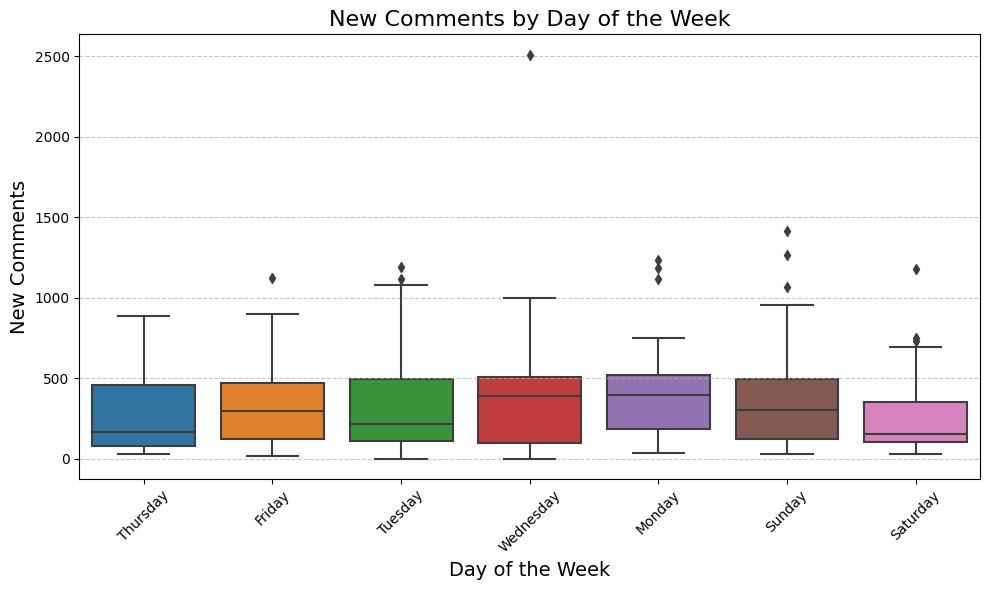

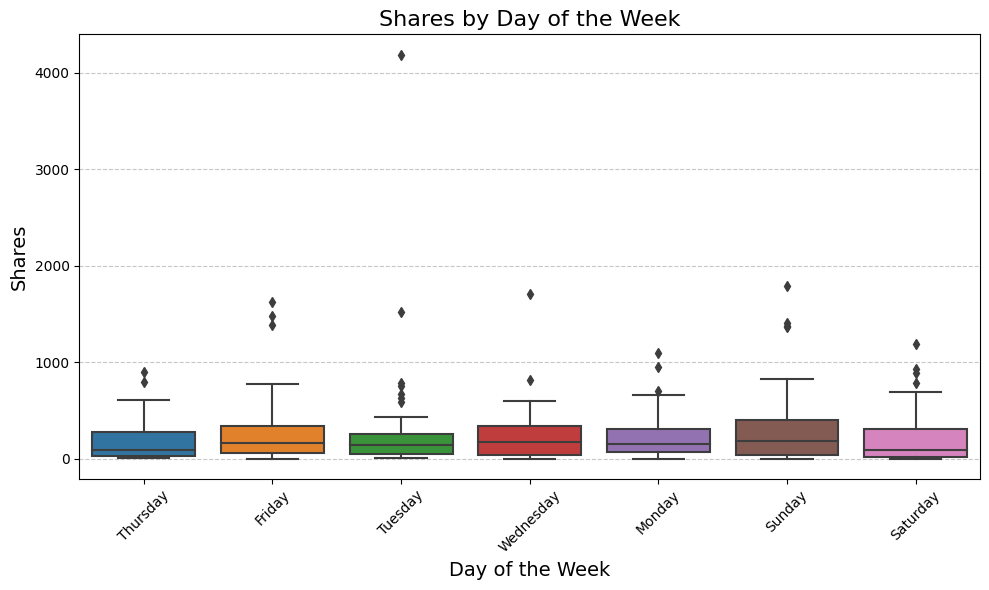

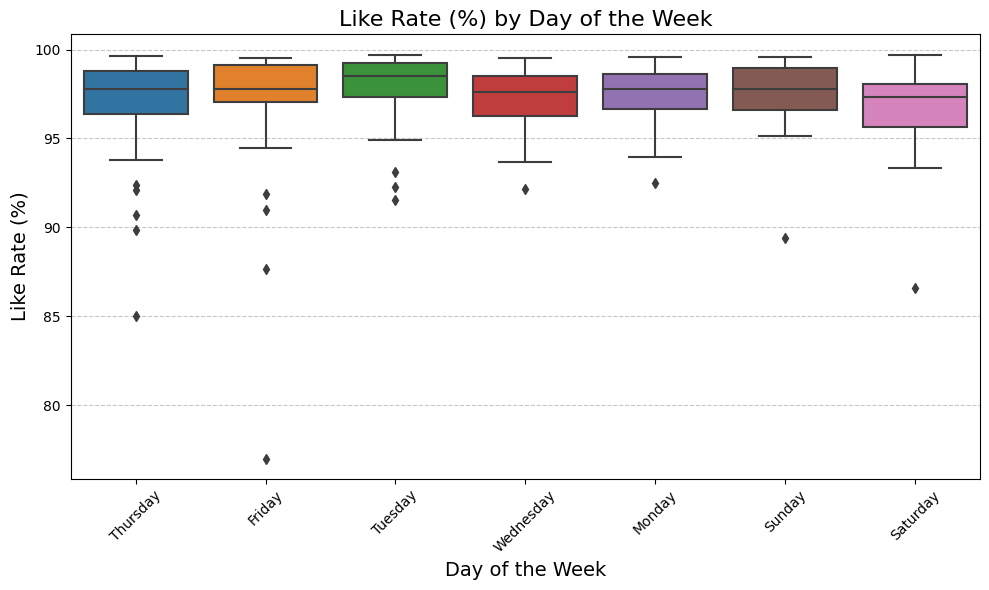

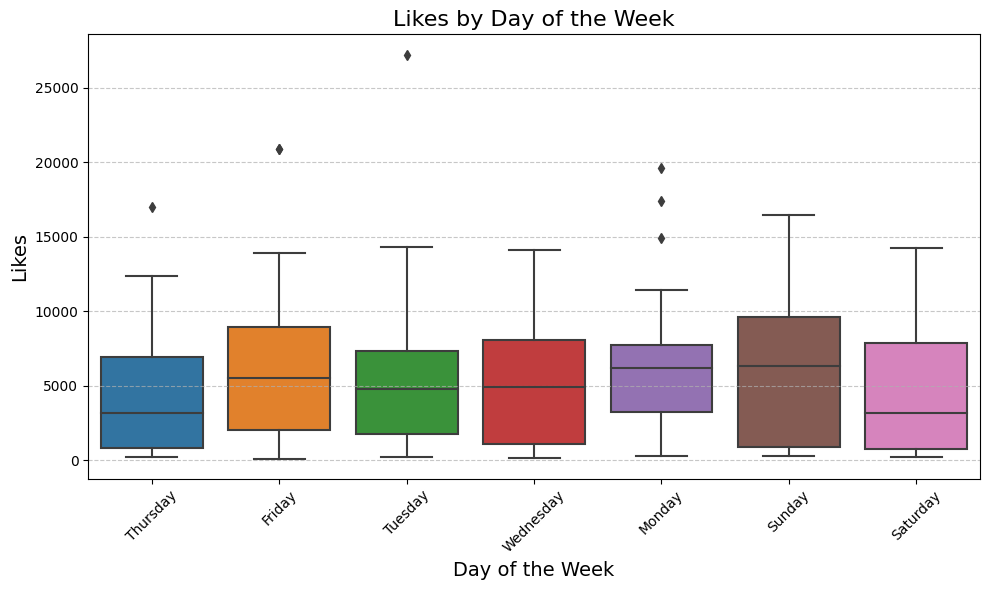

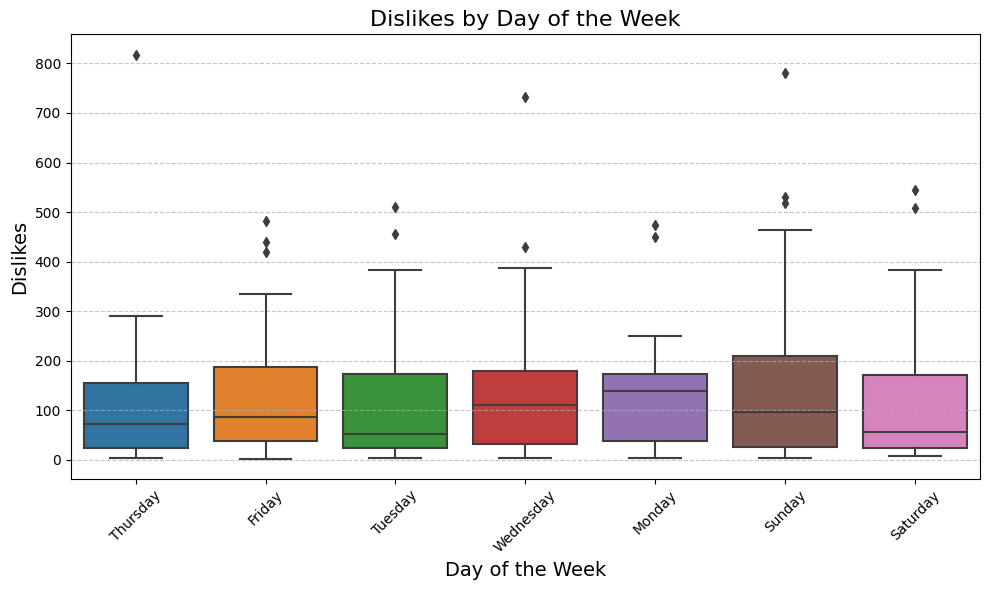

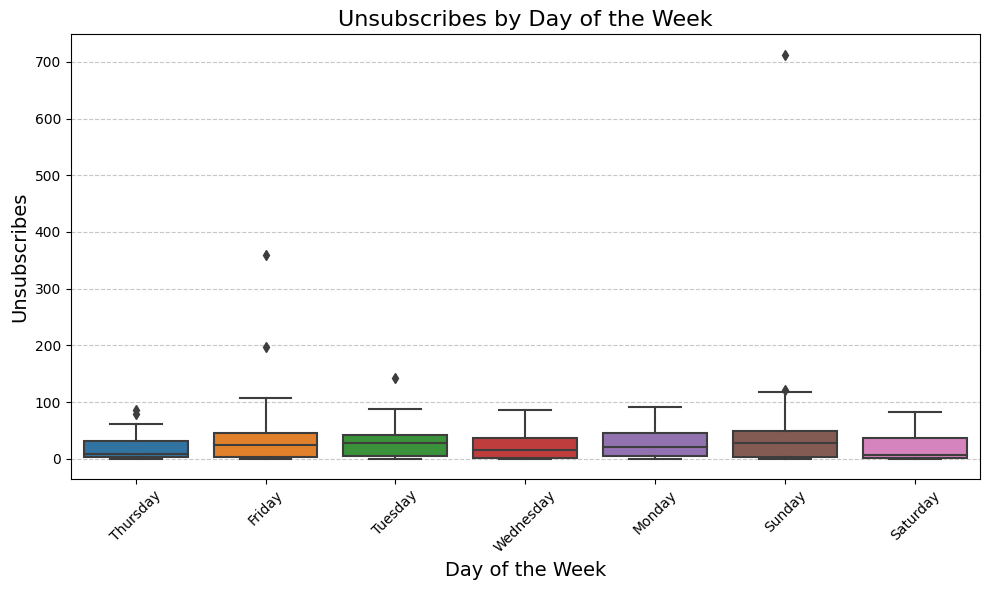

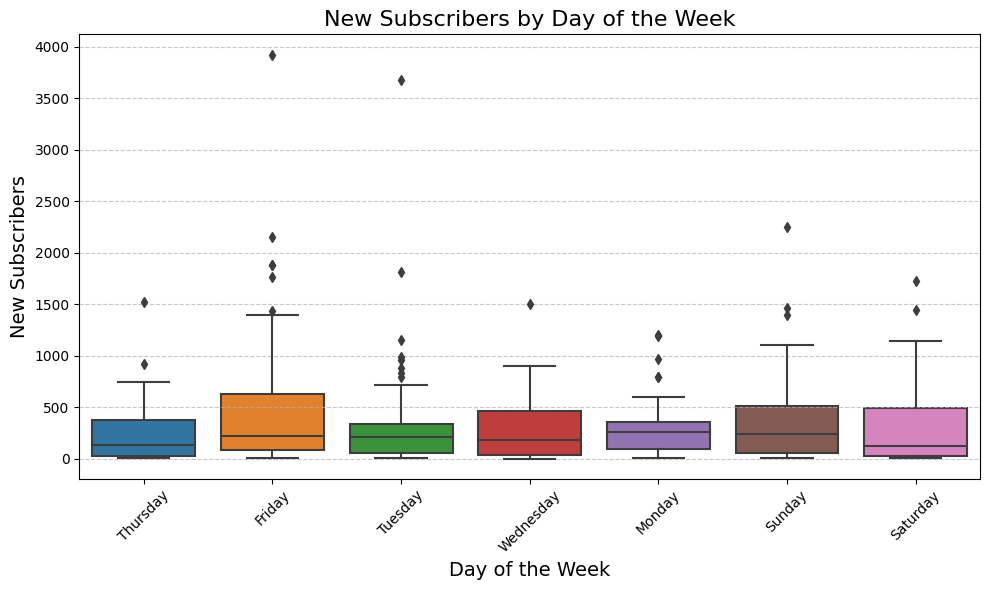

In [67]:


# Select relevant columns
engagement_metrics = ['New Comments', 'Shares', 'Like Rate (%)', 'Likes','Dislikes', 'Unsubscribes', 'New Subscribers']

# Iterate over the columns and create boxplots for each metric
for column in engagement_metrics:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Day of Week', y=column, data=df)
    plt.title(f'{column} by Day of the Week', fontsize=16)
    plt.xlabel('Day of the Week', fontsize=14)
    plt.ylabel(column, fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
